In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import HashingEncoder
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [160]:
df = pd.read_csv('../data/synthetic_delivery_requests_modified.csv')
df.head()

,weight,costOfGoods,destination,originBranchOfficeId,modalId,fulfillmentMethod,freightCostCurrency,deliveryMethodType,productCategory,quantity,isPickupEnabled,deliveryMethodId,state,shippingMethod,descriptionLogistic,estimatedDeliveryTimeUnit,providerShippingCost,origin,estimatedDeliveryTimeValue,isSchedulingEnabled,isRecommendation,description,freightCost,displayName,sku,idShop,deliveryEstimateBusinessDays,distinctOrigins
0,0.06,19.9,5613005,originBranchOfficeId_0,modalId_0,fulfillmentMethod_0,R$,deliveryMethodType_0,productCategory_0,1,isPickupEnabled_0,deliveryMethodId_0,state_0,shippingMethod_0,descriptionLogistic_0,DAY,5.73,23575450,4,isSchedulingEnabled_0,isRecommendation_0,description_0,freightCost_0,displayName_0,sku_0,idShop_0,4.0,1
1,0.25,19.9,5613005,originBranchOfficeId_0,modalId_0,fulfillmentMethod_0,R$,deliveryMethodType_0,productCategory_0,1,isPickupEnabled_0,deliveryMethodId_0,state_0,shippingMethod_0,descriptionLogistic_0,DAY,5.73,23575450,4,isSchedulingEnabled_0,isRecommendation_0,description_0,freightCost_0,displayName_0,sku_0,idShop_1,4.0,1
2,0.25,119.9,5613005,originBranchOfficeId_0,modalId_0,fulfillmentMethod_0,R$,deliveryMethodType_0,productCategory_1,1,isPickupEnabled_0,deliveryMethodId_0,state_0,shippingMethod_0,descriptionLogistic_0,DAY,5.73,23575450,4,isSchedulingEnabled_0,isRecommendation_0,description_0,freightCost_0,displayName_0,sku_1,idShop_1,4.0,1
3,0.40,19.9,5613005,originBranchOfficeId_0,modalId_0,fulfillmentMethod_0,R$,deliveryMethodType_0,productCategory_0,1,isPickupEnabled_0,deliveryMethodId_0,state_0,shippingMethod_0,descriptionLogistic_0,DAY,5.73,23575450,4,isSchedulingEnabled_0,isRecommendation_0,description_0,freightCost_0,displayName_0,sku_0,idShop_2,4.0,1
4,0.40,119.9,5613005,originBranchOfficeId_0,modalId_0,fulfillmentMethod_0,R$,deliveryMethodType_0,productCategory_1,1,isPickupEnabled_0,deliveryMethodId_0,state_0,shippingMethod_0,descriptionLogistic_0,DAY,5.73,23575450,4,isSchedulingEnabled_0,isRecommendation_0,description_0,freightCost_0,displayName_0,sku_1,idShop_2,4.0,1


Convertendo valores string em numérico extraindo do padrão "nomedacoluna_ID":

In [161]:
df = pd.read_csv('../data/synthetic_delivery_requests_modified.csv')
def get_id(df:pd.DataFrame):
    """
    Nos casos de dados que possuam o caractere "_" será extraído o número subsequente ao "_".
    """
    for col in df.columns:
        if isinstance(df[col][0], str) and '_' in df[col][0]:
            df[col]= df[col].map(lambda x: x.split('_')[1]).astype('int32')
    return df

df = get_id(df)

Verificando columnas estáticas:

In [162]:
df.nunique().sort_values()

estimatedDeliveryTimeUnit          1
freightCostCurrency                1
isRecommendation                   2
isSchedulingEnabled                3
isPickupEnabled                    3
distinctOrigins                    4
state                              5
fulfillmentMethod                  5
deliveryMethodType                 5
shippingMethod                     6
estimatedDeliveryTimeValue        13
deliveryEstimateBusinessDays      13
displayName                       15
deliveryMethodId                  16
description                       16
quantity                          17
descriptionLogistic               19
origin                            30
originBranchOfficeId              35
destination                      125
productCategory                  171
costOfGoods                      214
weight                           272
sku                              463
freightCost                      669
providerShippingCost             703
modalId                         1024
i

In [163]:
# Drop de colunas estáticas:
df= df.drop(['estimatedDeliveryTimeUnit', 'freightCostCurrency'],axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   weight                        6789 non-null   float64
 1   costOfGoods                   6789 non-null   float64
 2   destination                   6789 non-null   object 
 3   originBranchOfficeId          6789 non-null   int32  
 4   modalId                       6789 non-null   int32  
 5   fulfillmentMethod             6789 non-null   int32  
 6   deliveryMethodType            6789 non-null   int32  
 7   productCategory               6789 non-null   int32  
 8   quantity                      6789 non-null   int64  
 9   isPickupEnabled               6789 non-null   int32  
 10  deliveryMethodId              6789 non-null   int32  
 11  state                         6789 non-null   int32  
 12  shippingMethod                6789 non-null   int32  
 13  des

Apenas as colunas Origin and Destination não foram convertidas:

In [165]:
print(np.sort(df['origin'].unique()))
print(np.sort(df['destination'].unique()))

[' ' '0' '13070150' '13092500' '13315000' '14026020' '1423050' '2047051'
 '22640102' '23575450' '3110010' '36080060' '38060000' '4005004' '4005005'
 '4707000' '4707900' '59015900' '80530000' '80800800' '81330358'
 '89010203' '90040001' '91010004' '91010006' '91140310' '91340001'
 '91410400' '95110900' '9750700']
[' ' '0' '1048100' '1153000' '11674771' '11675560' '12070140' '12070410'
 '12070500' '13010061' '13070150' '13092500' '1310100' '1310200' '1310930'
 '1311000' '1311903' '1327900' '13300083' '13315000' '13335520' '13560470'
 '13831012' '14026020' '14026900' '1423050' '14234235' '1451011' '1454000'
 '15085440' '18200358' '2047051' '22631390' '22640100' '22640102'
 '23575450' '23575916' '3110010' '36080060' '3612000' '38060000' '4005004'
 '4707000' '4707900' '4870470' '5145000' '5398050' '5407002' '55641580'
 '5613005' '5613090' '5762260' '59015900' '59042250' '60175070' '69900004'
 '7097380' '71675310' '72880218' '78715233' '80010180' '80060205'
 '80530000' '80800800' '81330358' 

Existem valores nulos " ". Necessário tratamento:

In [166]:
df['origin'] = df['origin'].replace(' ', 1).astype('int')
df['destination'] = df['destination'].replace(' ', 1).astype('int')

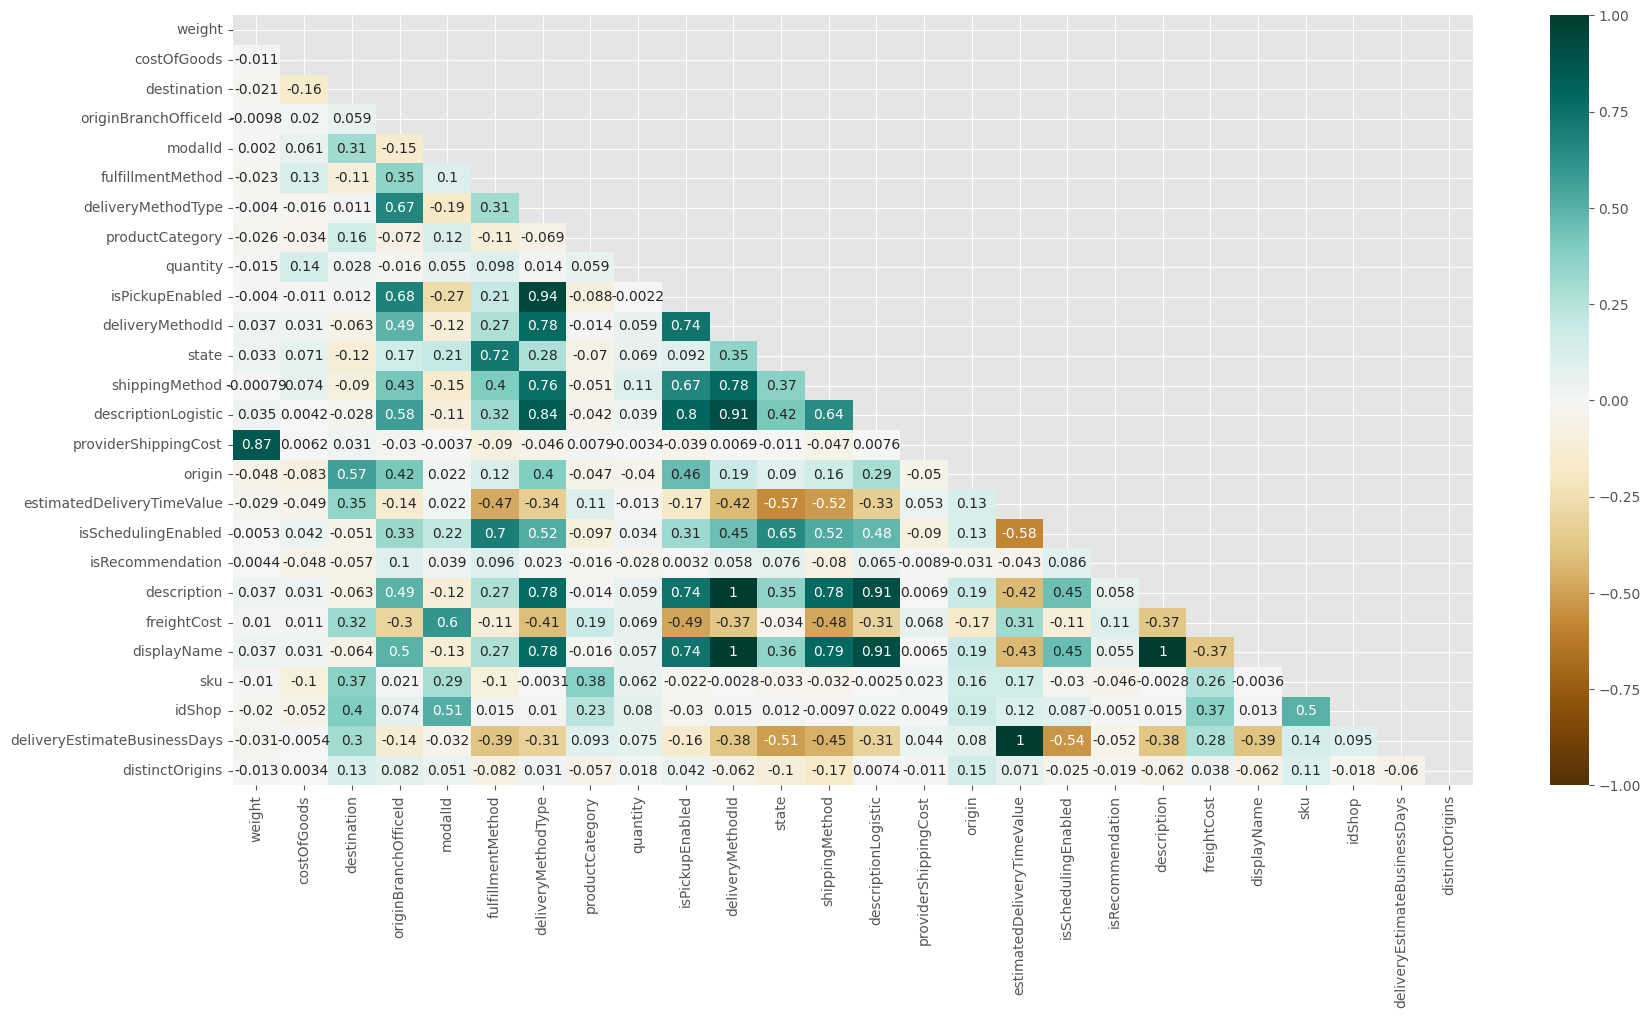

In [167]:
plt.figure(figsize=(20,10), dpi=100)
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df,vmin=-1, vmax=1, annot=True,cmap='BrBG', mask=mask)
plt.show()

Por este gráfico podemos ver que algumas colunas são praticamente iguais, para reduzir multicolinearidade vamos remover as colunas duplicadas:

In [168]:
df = df.drop(['description', # Igual a displayName
              'deliveryMethodType', # Igual a isPickupEnabled 
              'descriptionLogistic', # Muito semelhante a DeliveryMethodId
              'displayName', # Igual a deliveryMethodId
              'deliveryEstimateBusinessDays' #igual a estimateDeliveryTimeValue
              ], axis=1)

In [169]:
all_cols = df.columns
num_cols = ['weight', 'costOfGoods','quantity', 'providerShippingCost','estimatedDeliveryTimeValue']
cat_cols = [col for col in all_cols if col not in num_cols]
df = df[num_cols + cat_cols]

Após a limpeza dos dados vamos analisar a coluna alvo (providerShippingCost):

Primeiramente vamos analisar a distribuição dos dados de **Custo do Frete Fornecido** que será o alvo (target).

- O primeiro gráfico é um Boxplot, onde podemos visualizar o intervalo interquartil. O retângulo principal representa os valores do primeiro quartil (25% dos dados), do segundo quartil (Mediana, 50%) e do terceiro quartil (75%). As linhas, ou "bigodes", indicam o restante da distribuição dos dados. As barras no final dos bigodes mostram os valores que estão dentro do intervalo calculado pelo critério de 1,5 vezes o IQR (Intervalo Interquartil), o que ajuda a identificar e eliminar possíveis outliers.

- O gráfico ao lado do Boxplot é o **gráfico de violino**, que permite observar o formato da distribuição de frequência dos dados. Ele combina aspectos do boxplot com uma visualização da densidade dos dados, facilitando a análise de sua simetria ou assimetria.

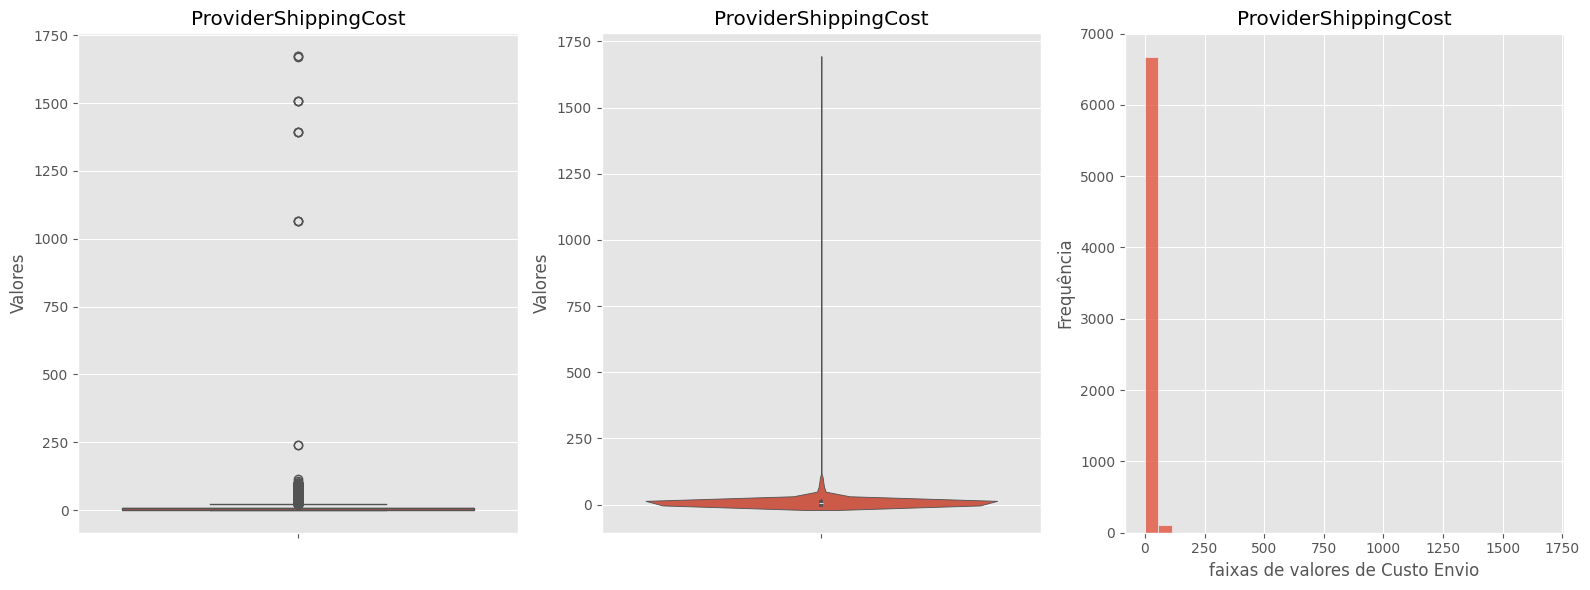

In [170]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

sns.boxplot(df['providerShippingCost'],ax=axes[0])
axes[0].set_yscale('linear')
axes[0].set_title('ProviderShippingCost')
axes[0].set_ylabel('Valores')

sns.violinplot(y=df['providerShippingCost'],ax=axes[1])
axes[1].set_yscale('linear')
axes[1].set_title('ProviderShippingCost')
axes[1].set_ylabel('Valores')
plt.tight_layout()

sns.histplot(df['providerShippingCost'],ax=axes[2], bins=30)
axes[2].set_title('ProviderShippingCost')
axes[2].set_ylabel('Frequência')
axes[2].set_xlabel('faixas de valores de Custo Envio')
plt.tight_layout()
plt.show()

Podemos ver que a distribuição de dados é alongada para valores grandes por conta de uma minoria de dados nesta faixa.
Para melhor visualização vamos utilizar eixos com **escala logarítmica**.

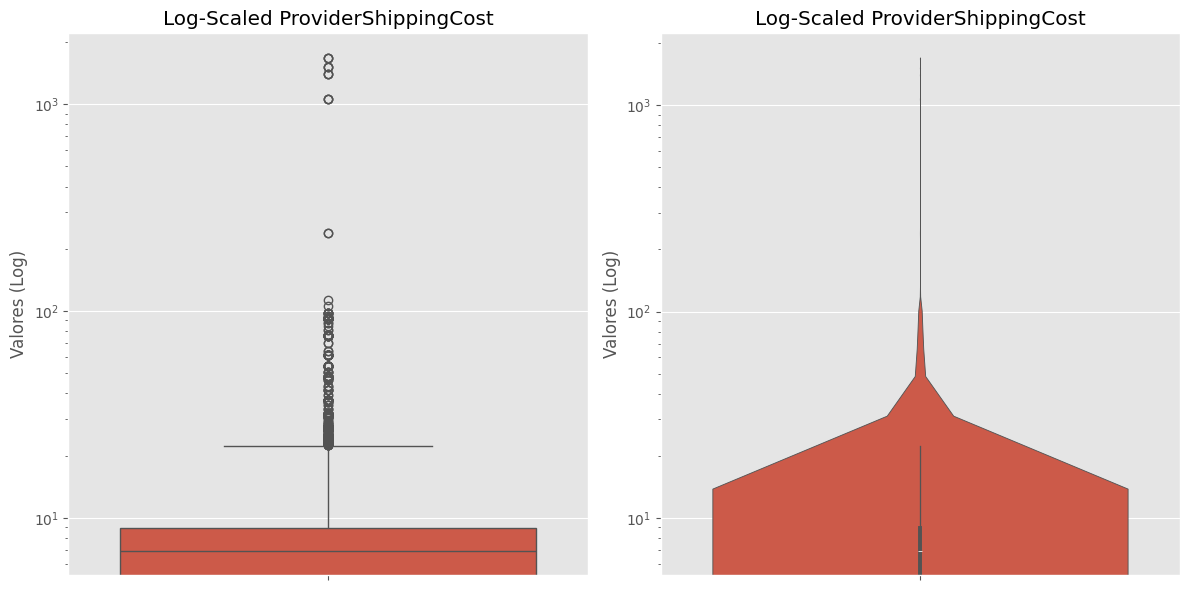

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df['providerShippingCost'],ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Log-Scaled ProviderShippingCost')
axes[0].set_ylabel('Valores (Log)')

sns.violinplot(y=df['providerShippingCost'],ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Log-Scaled ProviderShippingCost')
axes[1].set_ylabel('Valores (Log)')
plt.tight_layout()
plt.show()

Para auxiliar a visualização vamos ver um histograma normal e com **escala logarítmica** para os eixos X e Y:

Text(0.5, 0, 'valores (escala log)')

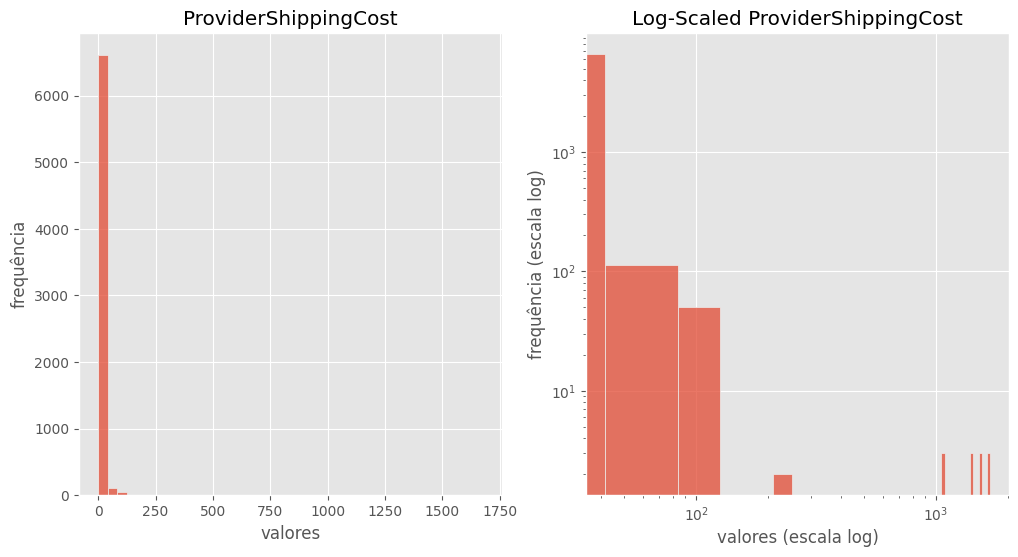

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['providerShippingCost'],ax=axes[0], bins = 40)
axes[0].set_ylabel('frequência')
axes[0].set_xlabel('valores')
axes[0].set_title('ProviderShippingCost')

sns.histplot(df['providerShippingCost'],ax=axes[1], bins = 40)
axes[1].set_title('Log-Scaled ProviderShippingCost')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_ylabel('frequência (escala log)')
axes[1].set_xlabel('valores (escala log)')

Avaliando valores de origem e destino que estavam Nulos e foram convertidos para valor numérico 1:

In [173]:
len(df[df['origin']==1]), len(df[df['destination']==1])

(291, 291)

In [174]:
df[df['origin']==1].describe().T.sort_values('std')['std']

isPickupEnabled                 0.000000
freightCost                     0.000000
isRecommendation                0.000000
providerShippingCost            0.000000
estimatedDeliveryTimeValue      0.000000
destination                     0.000000
isSchedulingEnabled             0.000000
origin                          0.000000
fulfillmentMethod               0.000000
shippingMethod                  0.000000
deliveryMethodId                0.000000
state                           0.284697
distinctOrigins                 0.488207
modalId                         0.521376
originBranchOfficeId            1.029198
quantity                        4.019224
productCategory                10.210279
weight                         20.270099
sku                            70.725127
idShop                        122.663996
costOfGoods                   325.141052
Name: std, dtype: float64

Como podemos ver algumas variáveis não apresentam variação dos valores nos casos de origem e destino Nulos.

In [175]:
df[df['origin']==1][['isPickupEnabled',
    'freightCost',
    'isRecommendation',        
    'providerShippingCost',      
    'estimatedDeliveryTimeValue',
    'destination',
    'isSchedulingEnabled',
    'origin',
    'fulfillmentMethod',
    'shippingMethod',
    'deliveryMethodId'          
]].drop_duplicates()

,isPickupEnabled,freightCost,isRecommendation,providerShippingCost,estimatedDeliveryTimeValue,destination,isSchedulingEnabled,origin,fulfillmentMethod,shippingMethod,deliveryMethodId
1121,1,0,0,0.0,0,1,2,1,3,5,12


Podemos eliminar estes dados pois qualquer uma destas classes já indicaria valor de frete igual a zero.

In [176]:
df = df[df['isSchedulingEnabled']!=2]

In [177]:
df.describe()

,weight,costOfGoods,quantity,providerShippingCost,estimatedDeliveryTimeValue,destination,originBranchOfficeId,modalId,fulfillmentMethod,productCategory,isPickupEnabled,deliveryMethodId,state,shippingMethod,origin,isSchedulingEnabled,isRecommendation,freightCost,sku,idShop,distinctOrigins
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,3.436573,116.077184,1.473246,15.129954,4.419946,5.235890e+07,4.978555,344.026858,0.084322,48.638976,0.564647,6.293983,0.368936,1.620446,2.787597e+07,0.904018,0.004997,174.356236,182.017073,1085.739121,1.069748
std,40.054056,204.218671,1.625066,71.965782,2.059909,4.203262e+07,9.166660,283.637781,0.483559,41.061995,0.900354,4.510317,0.522354,0.979918,3.081595e+07,0.294597,0.070519,203.004777,137.914072,688.240716,0.297019
min,0.000100,0.000000,1.000000,0.010000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.244000,20.000000,1.000000,6.530000,3.000000,4.005004e+06,0.000000,121.000000,0.000000,9.000000,0.000000,2.000000,0.000000,1.000000,3.110010e+06,1.000000,0.000000,0.000000,76.000000,393.000000,1.000000
50%,0.500000,49.900000,1.000000,7.650000,4.000000,8.133036e+07,1.000000,251.000000,0.000000,42.000000,0.000000,4.000000,0.000000,1.000000,2.357545e+07,1.000000,0.000000,59.000000,144.000000,1127.000000,1.000000
75%,0.900000,100.000000,1.000000,11.220000,6.000000,9.101001e+07,5.000000,567.000000,0.000000,67.000000,2.000000,12.000000,1.000000,3.000000,2.357545e+07,1.000000,0.000000,346.000000,302.000000,1645.000000,1.000000
max,800.500000,3359.900000,21.000000,1673.890000,16.000000,9.996000e+07,33.000000,1017.000000,4.000000,170.000000,2.000000,15.000000,3.000000,3.000000,9.511090e+07,1.000000,1.000000,665.000000,462.000000,2362.000000,3.000000


Análise de Multicolinearidade com Variance Inflation Factor:

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

x_df = df.drop('providerShippingCost',axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = x_df.columns
vif_data['VIF'] = [vif(x_df.values, i) for i in range(x_df.shape[1])]
vif_data.sort_values('VIF', ascending=False)

,Feature,VIF
12,shippingMethod,47.759553
9,isPickupEnabled,28.539621
14,isSchedulingEnabled,22.543619
10,deliveryMethodId,17.522782
6,modalId,9.731269
19,distinctOrigins,9.255944
16,freightCost,7.316503
18,idShop,6.977862
3,estimatedDeliveryTimeValue,6.586752
4,destination,5.851440


Colunas com valores acima de 10 são recomendados de serem removidos porem como os modelos de ML que serão utilizados não são afetados por multicolinearidade as colunas serão mantidas.

In [179]:
df.to_parquet('../data/df_cleared.parquet')

Treinamento do modelo segue no notebook **ml_training.ipynb**

Seguindo para análise da rede de endereços

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
relationship = df[['origin','destination']]
relationship['weight'] = 1
relationship = relationship.groupby(["origin","destination"], sort=False, as_index=False).sum()
relationship.sort_values('origin').sort_values('weight', ascending=False).head()

,origin,destination,weight
124,91010006,91010006,328
62,23575450,15085440,304
20,2047051,2047051,303
28,3110010,13560470,302
44,23575450,88010070,185


Criando a rede de grafos:

In [182]:
import networkx as nx
G = nx.DiGraph()
for index, row in relationship.iterrows():
    G.add_edge(row['origin'], row['destination'], weight=row['weight'])

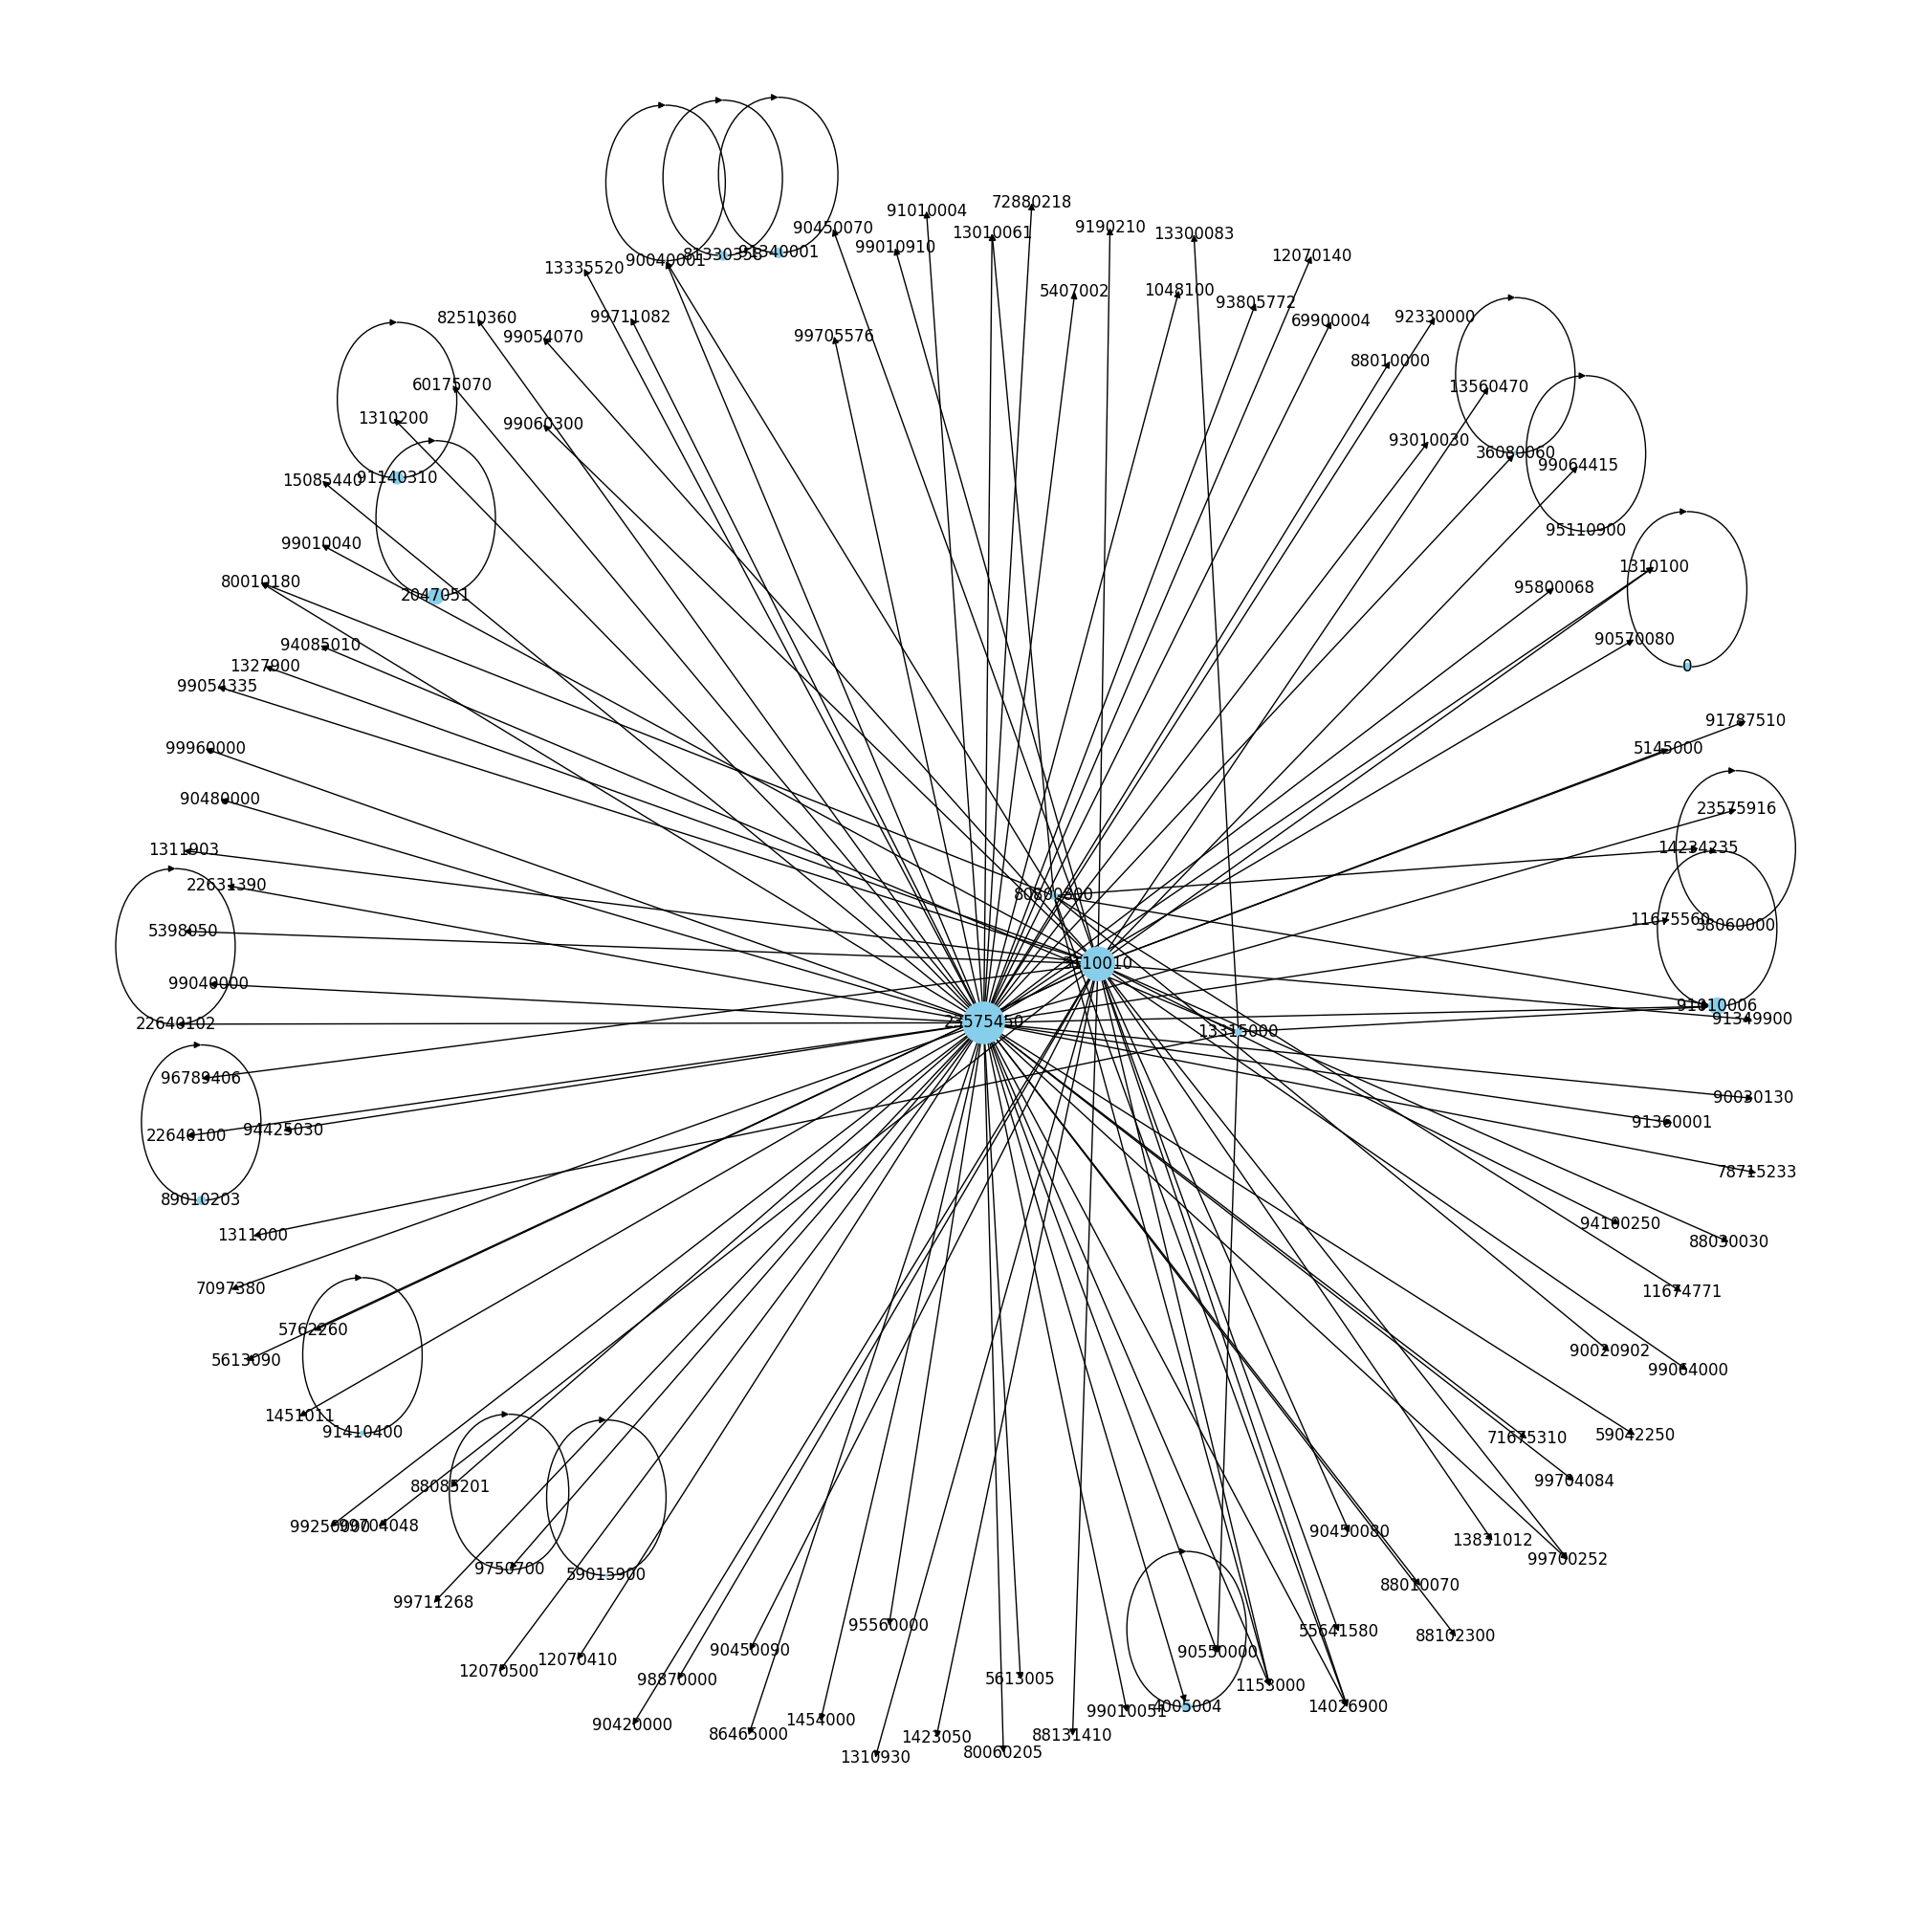

In [184]:
node_weights = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
# Normalize node sizes to fit a reasonable range for plotting
node_sizes = [1000 * node_weights[node] / max(node_weights.values()) for node in G.nodes()]

plt.figure(figsize=(20,20), dpi = 100)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues,node_size=node_sizes)
plt.show()

Podemos ver que existem alguns poucos nodes centrais que se relacionam com quase todos os pontos. Estes pontos centrais podem ser lojas de grande porte.

Análises de Centralidade levando em conta:

- Degree Centrality (Centralidade de Grau)

A Degree Centrality mede o número total de conexões que um nó tem dentro da rede. Quanto mais conexões um nó possui, maior sua centralidade de grau. Essa métrica é simples e útil para identificar nós que estão diretamente conectados a muitos outros nós, o que pode indicar sua importância local dentro da rede.

- In-Degree Centrality (Centralidade de Grau de Entrada)

A In-Degree Centrality é utilizada em grafos direcionados e mede quantas arestas apontam para um determinado nó, ou seja, quantos outros nós estão conectados a ele. Um nó com alta centralidade de grau de entrada é considerado um "ponto de chegada" importante na rede, recebendo muitas conexões de outros nós.

- Out-Degree Centrality (Centralidade de Grau de Saída)

A Out-Degree Centrality também é aplicada a grafos direcionados e mede quantas arestas saem de um nó, ou seja, quantos outros nós estão conectados por ele. Um nó com alta centralidade de grau de saída tem muitas conexões que apontam para outros nós, podendo indicar uma maior influência ou capacidade de disseminar informações pela rede.

- Eigenvector Centrality (Centralidade do Vetor Próprio)

A Eigenvector Centrality mede a influência de um nó em uma rede, considerando não apenas o número de conexões que ele tem, mas também a importância dos nós aos quais ele está conectado. Ou seja, um nó com alta centralidade de vetor próprio está conectado a muitos outros nós influentes. Essa métrica é útil para identificar nós que são centrais em uma rede de maneira mais global, levando em conta a qualidade das conexões.

- Betweenness Centrality (Centralidade de Intermediação)

A Betweenness Centrality mede quantas vezes um nó atua como intermediário no caminho mais curto entre dois outros nós. Um nó com alta centralidade de intermediação é crucial para o fluxo de informações na rede, pois conecta diferentes partes do grafo. Essa métrica é útil para identificar nós que desempenham um papel de "ponte" ou "corretor" entre grupos diferentes dentro de uma rede.

In [129]:
from pyvis.network import Network

import networkx as nx

# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# In-Degree Centrality  - Centralidade levando em conta grafo para o nó.
in_degree_centrality = nx.in_degree_centrality(G)

# Out-Degree Centrality - Centralidade levando em conta grafo saindo do nó.
out_degree_centrality = nx.out_degree_centrality(G)


eigenv_degree_centrality = nx.eigenvector_centrality(G, weight='weight')

edge_btwness_centrality = nx.edge_betweenness_centrality(G, weight='weight')

G = nx.relabel_nodes(G, lambda x: str(x) if not isinstance(x, (str, int)) else x)

node_centrality = {node: float(degree) * 100 for node, degree in degree_centrality.items()}
node_weights = {node: float(G.degree(node, weight='weight')) for node in G.nodes()}
nx.set_node_attributes(G, node_centrality, 'size')

# Initialize pyvis Network
net = Network(notebook=True, 
              width="1000px", 
              height="700px", 
              bgcolor='#222222', 
              font_color='white',
              cdn_resources='local'
              )

# Load the networkx graph into pyvis
net.from_nx(G)
net.save_graph("grafo.html")

In [130]:
len(list(degree_centrality.values()))

112

In [131]:
len(list(edge_btwness_centrality.values()))

126

Para visualizar o gráfico interativo criado acima é só abrir o arquivo grafo.html

In [146]:
edges = {
    'node1':[],
    'node2': [],
    'edge_btw_c': []
}
for k, v in edge_btwness_centrality.items():
    edges['node1'].append(int(k[0]))
    edges['node2'].append(int(k[1]))
    edges['edge_btw_c'].append(v)
edge_df = pd.DataFrame(edges)
    

In [147]:
node_centrality_df = pd.DataFrame({
    'node': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'in_degree_centrality': list(in_degree_centrality.values()),
    'out_degree_centrality': list(out_degree_centrality.values()),
    'eigenv_degree_centrality': list(eigenv_degree_centrality.values())
})

Top 10 maior grau de centralidadde

In [158]:
node_centrality_df.sort_values('degree_centrality', ascending=False)[:10]

,node,degree_centrality,in_degree_centrality,out_degree_centrality,eigenv_degree_centrality
0,23575450,0.549550,0.000000,0.549550,3.338528e-08
6,3110010,0.315315,0.000000,0.315315,3.338528e-08
10,80800800,0.081081,0.000000,0.081081,3.338528e-08
39,13315000,0.045045,0.000000,0.045045,3.338528e-08
15,91010006,0.045045,0.036036,0.009009,5.601120e-01
21,90040001,0.036036,0.027027,0.009009,4.200840e-01
13,14026900,0.027027,0.027027,0.000000,2.236814e-06
78,36080060,0.027027,0.018018,0.009009,2.800560e-01
47,4005004,0.027027,0.018018,0.009009,2.800560e-01
46,9750700,0.027027,0.018018,0.009009,2.800560e-01
